In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
DATA_DIR = "/content/drive/MyDrive/HONS_POTATOES/training"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10


In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

Found 901 images belonging to 3 classes.


In [ ]:
val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

Found 225 images belonging to 3 classes.


In [ ]:
NUM_CLASSES = train_gen.num_classes

In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False  # fast training

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 180s 6s/step - accuracy: 0.6961 - loss: 0.6283 - val_accuracy: 0.7244 - val_loss: 0.6433
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9566 - loss: 0.1389 - val_accuracy: 0.8400 - val_loss: 0.3857
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9773 - loss: 0.0824 - val_accuracy: 0.9200 - val_loss: 0.2468
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9878 - loss: 0.0419 - val_accuracy: 0.9111 - val_loss: 0.2437
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9922 - loss: 0.0395 - val_accuracy: 0.8844 - val_loss: 0.2886


In [ ]:
model.save("/content/drive/MyDrive/mobilenetv2_potato.h5")

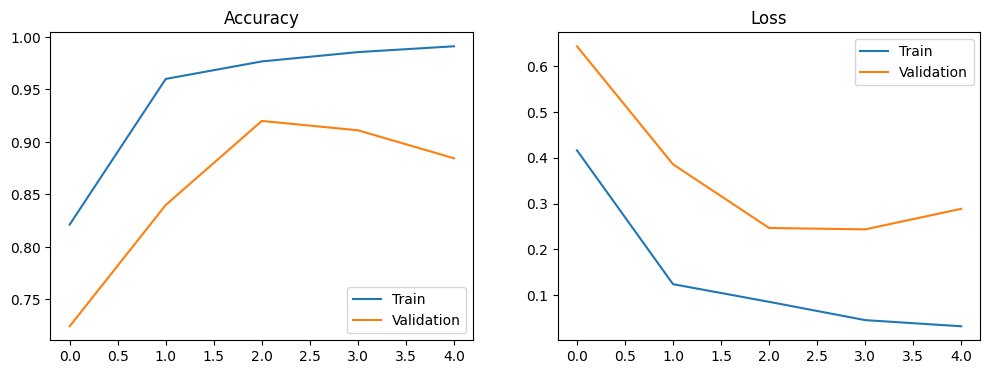

In [ ]:
acc = []
val_acc = []
loss = []
val_loss = []

if 'history' in globals():
    acc += history.history["accuracy"]
    val_acc += history.history["val_accuracy"]
    loss += history.history["loss"]
    val_loss += history.history["val_loss"]

if 'history_ft' in globals():
    acc += history_ft.history["accuracy"]
    val_acc += history_ft.history["val_accuracy"]
    loss += history_ft.history["loss"]
    val_loss += history_ft.history["val_loss"]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(acc)
plt.plot(val_acc)
plt.title("Accuracy")
plt.legend(["Train", "Validation"])

plt.subplot(1,2,2)
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss")
plt.legend(["Train", "Validation"])

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

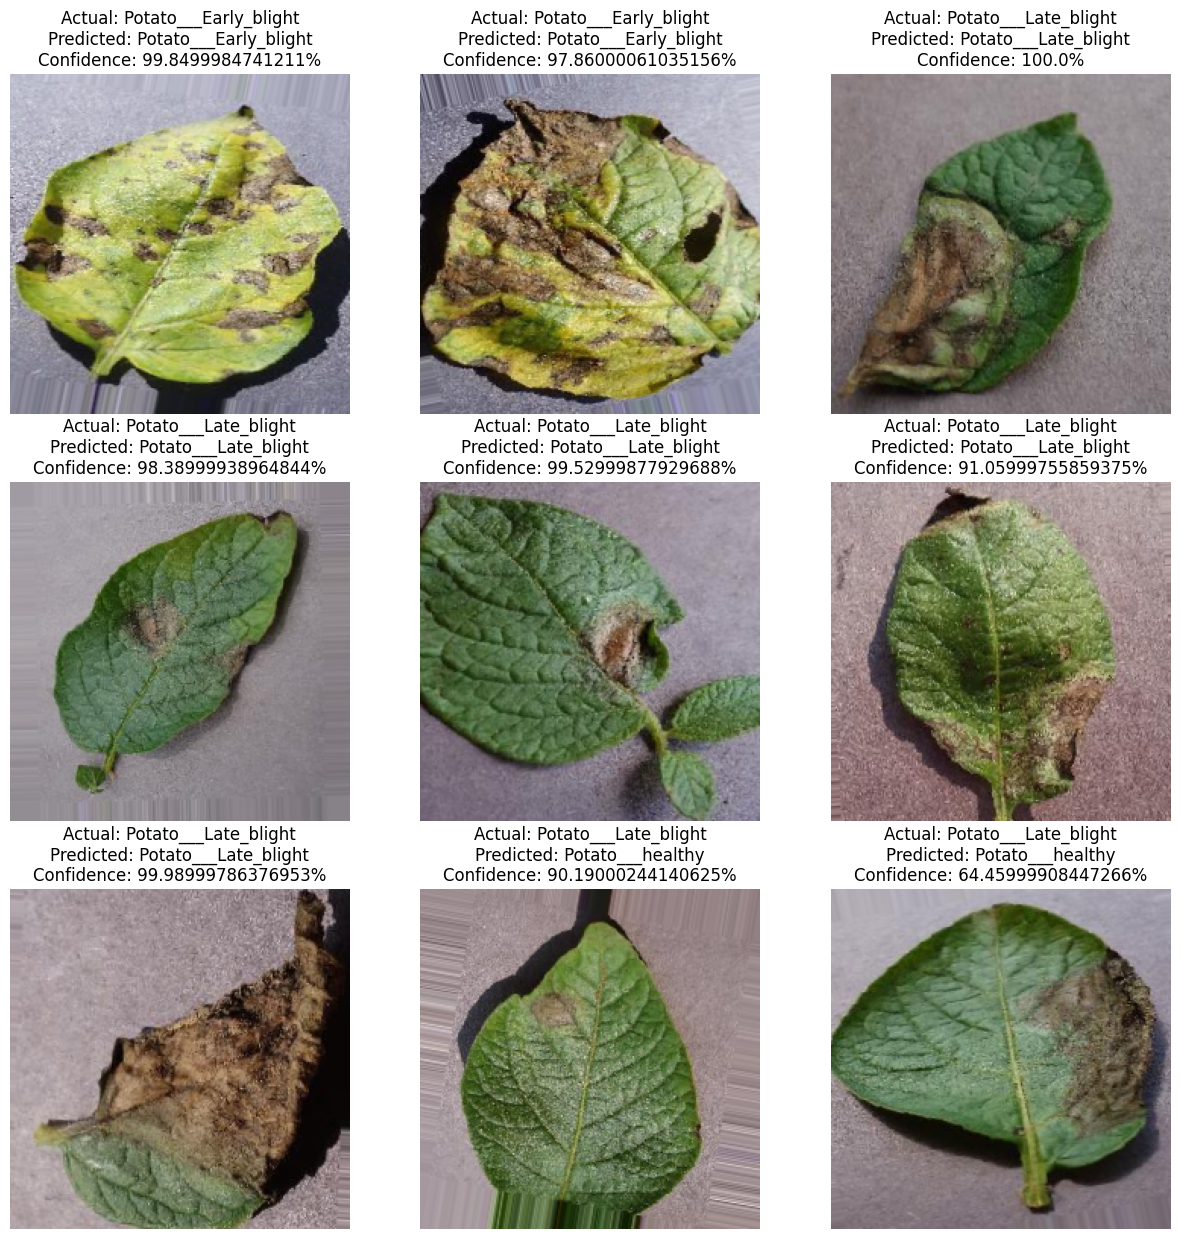

In [ ]:
class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(15, 15))
shown = 0
for images, labels in val_gen:   # loop over batches
    for i in range(len(images)):
        ax = plt.subplot(3, 3, shown + 1)

        img = images[i]
        preds = model.predict(np.expand_dims(img, axis=0), verbose=0)

        pred_idx = np.argmax(preds)
        confidence = round(np.max(preds) * 100, 2)

        predicted_class = class_names[pred_idx]
        actual_class = class_names[np.argmax(labels[i])]

        plt.imshow((img + 1) / 2)
        plt.title(
            f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%"
        )
        plt.axis("off")

        shown += 1
        if shown == 9:
            break
    if shown == 9:
        break

plt.show()

<Figure size 600x600 with 0 Axes>

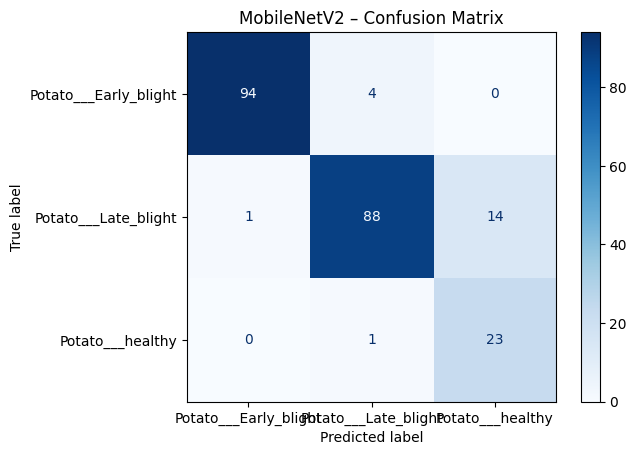

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# reset generator
val_gen.reset()

y_true = []
y_pred = []

for images, labels in val_gen:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels, axis=1))

    if len(y_true) >= val_gen.samples:
        break

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names
)

plt.figure(figsize=(6,6))
disp.plot(cmap="Blues", values_format="d")
plt.title("MobileNetV2 – Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

class_acc = cm.diagonal() / cm.sum(axis=1)

df = pd.DataFrame({
    "Class": class_names,
    "Accuracy": class_acc
})

df


,Class,Accuracy
0,Potato___Early_blight,0.959184
1,Potato___Late_blight,0.854369
2,Potato___healthy,0.958333


from matplotlib import pyplot as plt
df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Accuracy', y='Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

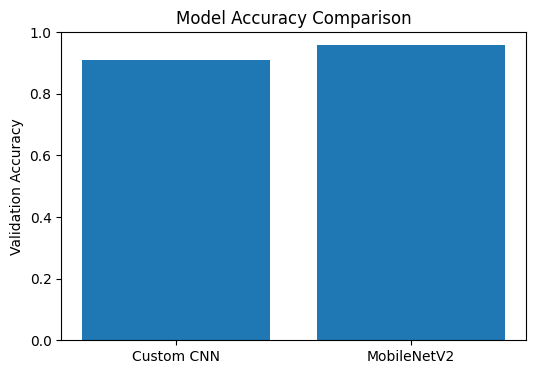

In [ ]:
models = ["Custom CNN", "MobileNetV2"]
accuracies = [0.91, 0.96]
plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylim(0,1)
plt.ylabel("Validation Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


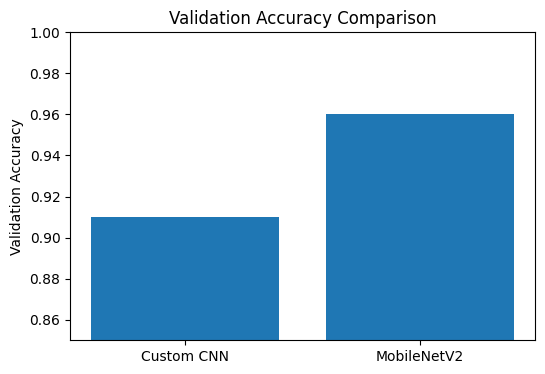

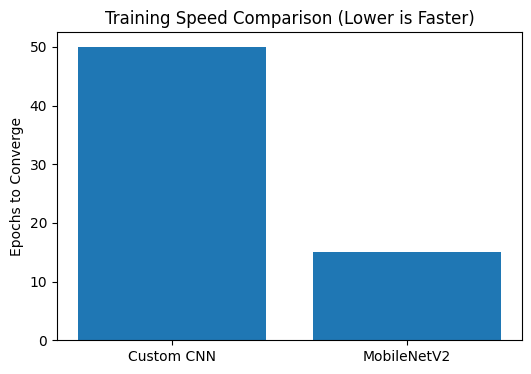

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Custom CNN", "MobileNetV2"]

val_accuracy = [0.91, 0.96]
epochs_taken = [50, 15]

# Accuracy Comparison
plt.figure(figsize=(6,4))
plt.bar(models, val_accuracy)
plt.ylim(0.85, 1.0)
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison")
plt.show()

# Training Speed Comparison
plt.figure(figsize=(6,4))
plt.bar(models, epochs_taken)
plt.ylabel("Epochs to Converge")
plt.title("Training Speed Comparison (Lower is Faster)")
plt.show()
